# Assignment 2:
## Name: Truong Nguyen
## Group: DS-01
## Email: t.nguyen@innopolis.university

### Task 1: 

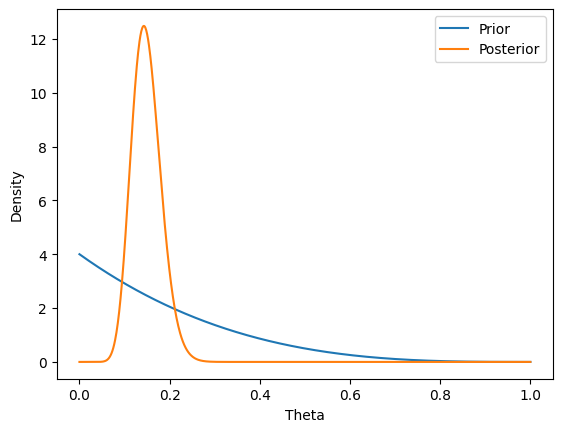

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Define the parameters of the Beta prior distribution
alpha = 1
beta = 4

# Define the data
x = 17
n = 116

# Calculate the parameters of the posterior distribution
alpha_post = alpha + x
beta_post = beta + n - x

# Define the range of values for theta
theta_range = np.linspace(0, 1, 1000)

# Calculate the prior, posterior, and normalized likelihood
prior = stats.beta.pdf(theta_range, alpha, beta)
posterior = stats.beta.pdf(theta_range, alpha_post, beta_post)

# Plot the prior, posterior, and normalized likelihood
plt.plot(theta_range, prior, label='Prior')
plt.plot(theta_range, posterior, label='Posterior')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()
plt.show()


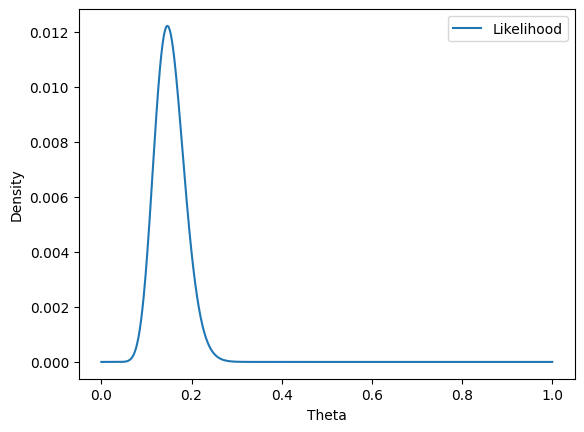

In [2]:
likelihood = stats.binom.pmf(x, n, theta_range)  # normalized by integrating over theta_range

# Normalize the likelihood to have integral of 1
sum_likelihood = np.sum(likelihood)
likelihood = likelihood / sum_likelihood

plt.plot(theta_range, likelihood, label='Likelihood')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()
plt.show()

In [3]:
import scipy.stats as stats

# Calculate the posterior probability that theta < 0.1
post_prob = stats.beta.cdf(0.1, alpha_post, beta_post)

print("The posterior probability that theta < 0.1 is:", post_prob)


The posterior probability that theta < 0.1 is: 0.053094376993042654


In [4]:
# Calculate the central 95% posterior credible interval for theta
lower = stats.beta.ppf(0.025, alpha_post, beta_post)
upper = stats.beta.ppf(0.975, alpha_post, beta_post)

print("The central 95% posterior credible interval for theta is: [{:.3f}, {:.3f}]".format(lower, upper))

The central 95% posterior credible interval for theta is: [0.091, 0.217]


### Task 2:

In [5]:
# Download the dataset

!curl https://raw.githubusercontent.com/hflabs/city/ae661bffe572880472249097c9b29c42b09650ea/city.csv > city.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  316k  100  316k    0     0   280k      0  0:00:01  0:00:01 --:--:--  280k


In [6]:
# Load the dataset

import pandas as pd

city_df = pd.read_csv("city.csv")

In [7]:
city_df.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


In [8]:
# 30 most populated cities

cities = city_df[city_df.address.apply(lambda x: x[0] == 'г')].sort_values("population", ascending=False)[:30]

In [9]:
cities

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221
927,г Казань,420000.0,Россия,Приволжский,Респ,Татарстан,NaN,NaN,г,Казань,...,4,2,92401000000,92701000001,1600,UTC+3,55.794358,49.111497,1216965,1005
782,г Самара,443000.0,Россия,Приволжский,обл,Самарская,NaN,NaN,г,Самара,...,4,2,36401000000,36701000,6300,UTC+4,53.195031,50.106952,1164900,1586
656,г Омск,644000.0,Россия,Сибирский,обл,Омская,NaN,NaN,г,Омск,...,4,2,52401000000,52701000001,5500,UTC+6,54.984857,73.367452,1154000,1716
1064,г Челябинск,454000.0,Россия,Уральский,обл,Челябинская,NaN,NaN,г,Челябинск,...,4,2,75401000000,75701000001,7400,UTC+5,55.160262,61.400808,1130273,1736
757,г Ростов-на-Дону,344000.0,Россия,Южный,обл,Ростовская,NaN,NaN,г,Ростов-на-Дону,...,4,2,60401000000,60701000001,6100,UTC+3,47.222457,39.718803,1091544,1749


In [10]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the Earth's surface using the Haversine formula.
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Calculate the differences between the latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Apply the Haversine formula
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371  # Radius of the Earth in kilometers
    distance = R * c
    
    return distance

def city_query(city:str):
    try:
        return cities[cities.address.str.lower() == "г "+ city.lower()].iloc[0]
    except:
        raise "No such city name !"

def cities_dist(city1, city2):
    city1_df = city_query(city1)
    city2_df = city_query(city2)
    
    return haversine(city1_df['geo_lat'], city1_df['geo_lon'], city2_df['geo_lat'], city2_df['geo_lon'])

In [11]:
# Create a distance matrix

n = len(cities)
dist_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        lat1, lon1 = cities.iloc[i]['geo_lat'], cities.iloc[i]['geo_lon']
        lat2, lon2 = cities.iloc[j]['geo_lat'], cities.iloc[j]['geo_lon']
        dist_matrix[i][j] = haversine(lat1, lon1, lat2, lon2)

In [12]:
# Define energy function
def energy(path, dist_matrix, T):
    try:
        return np.exp(
            -np.sum(
                [
                    dist_matrix[path[i]][path[i + 1]] / 100000
                    for i in range(len(path) - 1)
                ]
            )
            / T
        )
    except Exception as e:
        print(path, T)
        raise e


# Define proposal function
def proposal(path):
    new_path = path.copy()
    i, j = np.random.choice(len(path), 2, replace=False)
    new_path[i], new_path[j] = new_path[j], new_path[i]
    return new_path


# Define annealing schedule
def annealing_schedule_fast_cooling(T0, alpha):
    return lambda k: T0 * alpha**k


def annealing_schedule_slow_cooling(T0, delta=1e-6):
    return lambda k: T0 / np.log(1 + k**20 + delta)


def annealing_schedule_middle_cooling(T0, alpha, delta=1e-6):
    return lambda k: T0 * np.log(1 + k + delta) * alpha**k

In [13]:
import warnings

warnings.filterwarnings("error", category=RuntimeWarning)


# Define simulated annealing function
def simulated_annealing(energy, proposal, annealing_schedule, initial_state, n_iterations, T0):
    current_state = initial_state
    current_energy = energy(current_state, dist_matrix, annealing_schedule(0))
    history = [(current_state, current_energy, T0)]
    for i in range(1, n_iterations):
        T = annealing_schedule(i)
        proposed_state = proposal(current_state)
        proposed_energy = energy(proposed_state, dist_matrix, T)
        if np.isfinite(proposed_energy) and np.isfinite(current_energy):
            try:
                acceptance_prob = min(1, proposed_energy / current_energy)
            except Exception as e:
                print(proposed_energy, current_energy)
                raise e
        else:
            acceptance_prob = 0

        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
            current_energy = proposed_energy
        history.append((current_state, current_energy, T))
    return history


In [37]:
# Define initial state
initial_state = list(range(n))

# Define parameters
n_iterations = 1000
T0 = 2000
alpha = 0.95

# Run simulated annealing with different annealing rates
history_fast = simulated_annealing(energy, proposal, annealing_schedule_fast_cooling(T0, alpha), initial_state, n_iterations, T0)
history_slow = simulated_annealing(energy, proposal, annealing_schedule_slow_cooling(T0, alpha), initial_state, n_iterations, T0)
history_middle = simulated_annealing(energy, proposal, annealing_schedule_middle_cooling(T0, alpha), initial_state, n_iterations, T0)

In [38]:
# Print optimized paths and their energies
print('Fast cooling:', history_fast[-1][0], history_fast[-1][1])
print('Medium cooling:', history_middle[-1][0], history_middle[-1][1])
print('Slow cooling:', history_slow[-1][0], history_slow[-1][1])

Fast cooling: [20, 1, 16, 26, 21, 9, 19, 24, 29, 17, 28, 11, 25, 10, 6, 14, 18, 3, 5, 0, 15, 13, 8, 12, 22, 23, 7, 2, 27, 4] 0.0016273043870328996
Medium cooling: [18, 20, 16, 15, 28, 10, 8, 2, 3, 27, 1, 13, 22, 4, 23, 14, 21, 19, 7, 29, 11, 26, 17, 0, 5, 9, 25, 6, 24, 12] 2.786362814398755e-05
Slow cooling: [6, 9, 12, 17, 11, 13, 5, 21, 10, 28, 23, 14, 4, 15, 2, 19, 26, 22, 7, 3, 27, 1, 16, 8, 0, 24, 25, 29, 20, 18] 0.9578746461326474


- Medium cooling even though was a bit slower, but produced much lower energy (2.786362814398755e-05) compared to fast (0.0016273043870328996) and slow (0.9578746461326474)

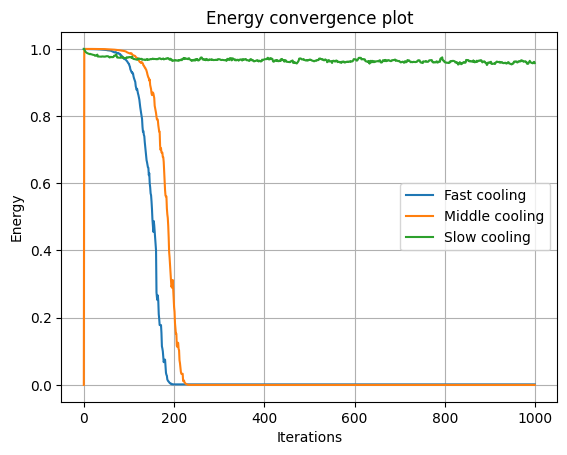

In [39]:
plt.plot([history[1] for history in history_fast], label="Fast cooling")
plt.plot([history[1] for history in history_middle], label="Middle cooling")
plt.plot([history[1] for history in history_slow], label="Slow cooling")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Energy convergence plot")
plt.grid()
# plt.savefig('plots.png')
plt.show()

In [17]:
import json

with open('russia.json') as f:
  outline_json = json.loads(f.read())

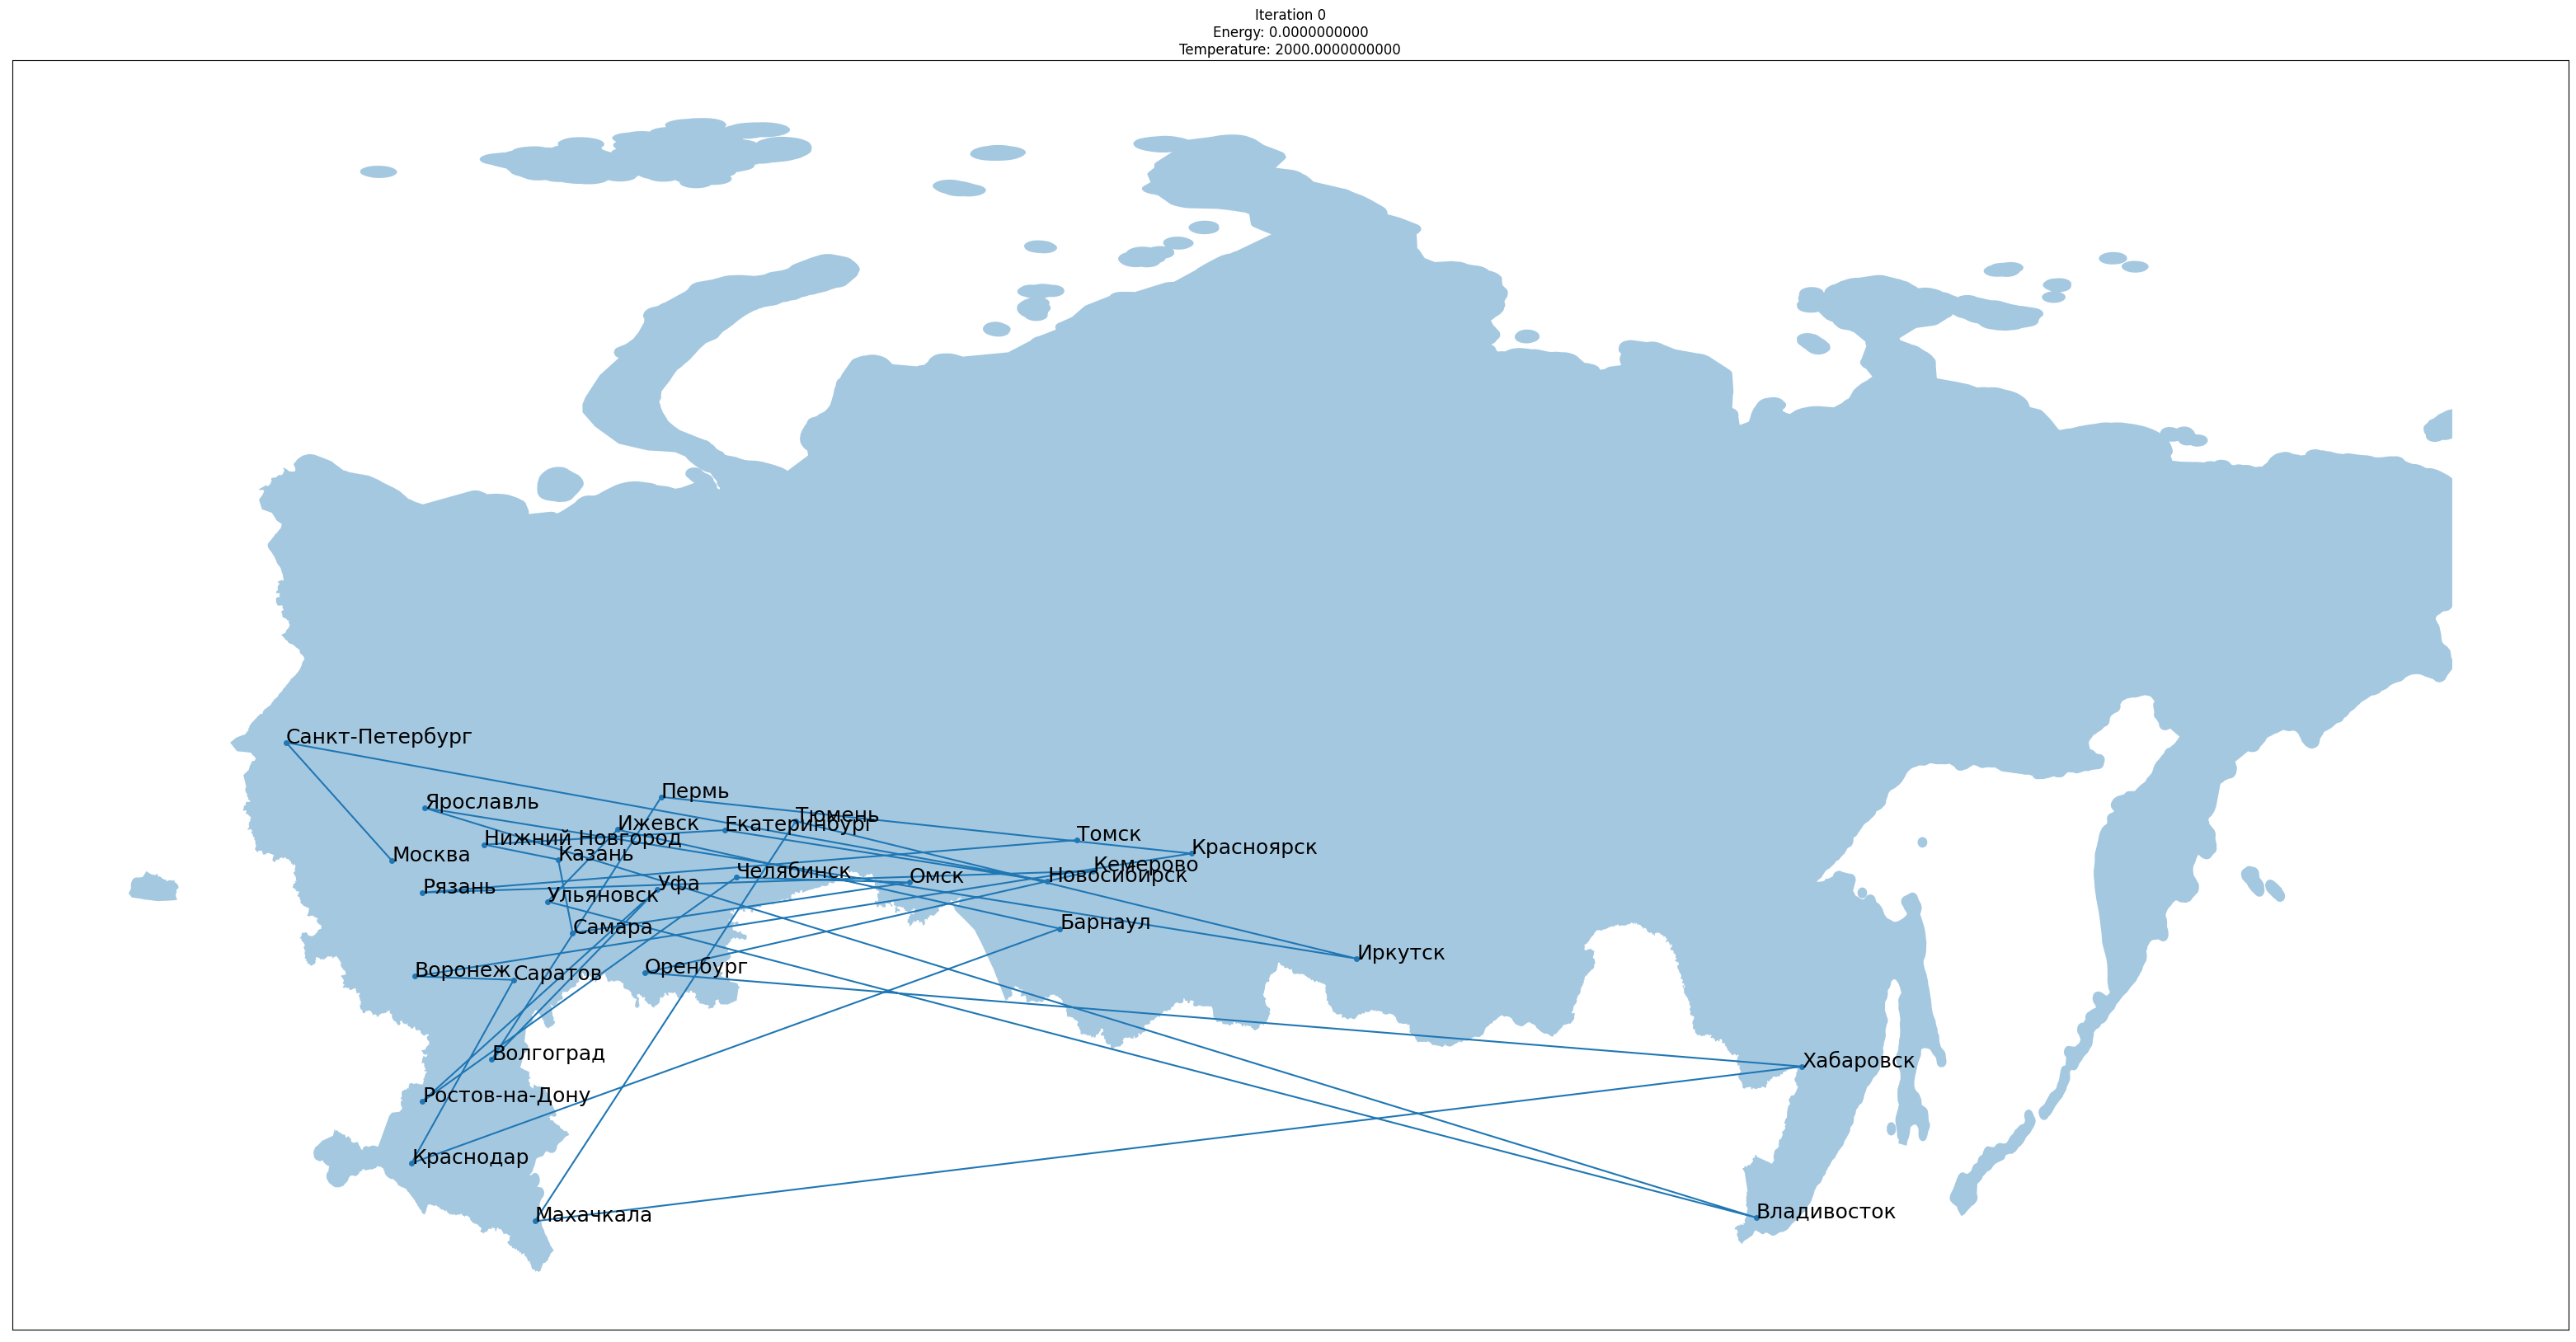

In [40]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

history = history_middle

fig, ax = plt.subplots(figsize=(40, 20))


patches = []

for polygon in outline_json[0]['geojson']['coordinates'][4:]:
    patches.append(Polygon(polygon[0]))
    
pc = PatchCollection(patches, alpha=0.4)


def animate(i):
    path, energy, T = history[i]
    ax.clear()
    ax.set_title(f"Iteration {i}\nEnergy: {energy:.10f}\nTemperature: {T:.10f}")
    
    lons = []
    lats = []
    for idx in path:
        lon = cities.iloc[idx]["geo_lon"]
        lons.append(lon)
        lat = cities.iloc[idx]["geo_lat"]
        lats.append(lat)
        
        name = cities.iloc[idx]["address"][2:]
        
        ax.text(lon, lat, name, fontsize=18)
    
    ax.plot(lons, lats, 'o-', markersize=4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.add_collection(pc)
    ax.autoscale()

ani = animation.FuncAnimation(fig, animate, frames=len(history), interval=n_iterations, repeat=True)
ani.save("middle_optimization.mp4", writer=animation.FFMpegWriter(fps=20))
